In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 298)

In [6]:
X.shape[1]

298

In [7]:
AR2_Base = []
MAE_Base = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    elastic = ElasticNet(alpha=1, l1_ratio=0.5)
    elastic.fit(X_train_scaled,Y_train)
    
    pred = elastic.predict(X_test_scaled)
    
    Elastic_Score = elastic.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1-Elastic_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Base.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Base.append(mae)




In [8]:
Base = pd.DataFrame({'AR2_Base': AR2_Base, 'MAE_Base': MAE_Base})
Base

,AR2_Base,MAE_Base
0,0.867938,15044.641891
1,0.898639,15265.256568
2,0.856060,16195.908912
3,0.865237,15526.049305
4,0.876148,15014.363224
5,0.879389,14878.609956
6,0.891775,15190.787618
7,0.890865,15220.029592
8,0.875387,15845.482472
9,0.872490,15632.044064


In [9]:
base_drop1 = pd.read_csv('BaseDrop1.csv')

In [10]:
base_drop1.shape

(2579, 299)

In [11]:
X2 = base_drop1.drop(['SalePrice'], axis=1).values
y2 = base_drop1.SalePrice.values

In [12]:
len(y2)

2579

In [13]:
X2.shape

(2579, 298)

In [14]:
X2.shape[1]

298

In [15]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X2,y2,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    elastic = ElasticNet(alpha=1, l1_ratio=0.5)
    elastic.fit(X_train_scaled,Y_train)
    
    pred = elastic.predict(X_test_scaled)
    
    Elastic_Score = elastic.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1-Elastic_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)


In [16]:
BaseDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
BaseDrop1

,AR2_Drop1,MAE_Drop1
0,0.895055,15116.132278
1,0.889226,15145.154074
2,0.875307,14999.740322
3,0.874238,15213.461531
4,0.889170,15823.299494
5,0.896732,15058.046219
6,0.885424,15095.900814
7,0.900846,14648.860028
8,0.885500,15590.449979
9,0.901589,14954.073313


In [17]:
base_drop_IF = pd.read_csv('BaseDropIF.csv')

In [18]:
base_drop_IF.shape

(2568, 299)

In [19]:
X3 = base_drop_IF.drop(['SalePrice'], axis=1).values
y3 = base_drop_IF.SalePrice.values

In [20]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    elastic = ElasticNet(alpha=1, l1_ratio=0.5)
    elastic.fit(X_train_scaled,Y_train)
    
    pred = elastic.predict(X_test_scaled)
    
    Elastic_Score = elastic.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1-Elastic_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)




In [21]:
BaseDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
BaseDropIF

,AR2_DropIF,MAE_DropIF
0,0.894067,14190.258774
1,0.882481,15145.184639
2,0.902441,13892.417899
3,0.904218,14874.886629
4,0.894966,14894.984827
5,0.893227,14654.396379
6,0.876323,16572.681549
7,0.887057,15467.551876
8,0.895970,15227.069530
9,0.887422,14335.976696


In [22]:
box = pd.concat([Base, BaseDrop1, BaseDropIF], axis=1)
box

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.867938,15044.641891,0.895055,15116.132278,0.894067,14190.258774
1,0.898639,15265.256568,0.889226,15145.154074,0.882481,15145.184639
2,0.856060,16195.908912,0.875307,14999.740322,0.902441,13892.417899
3,0.865237,15526.049305,0.874238,15213.461531,0.904218,14874.886629
4,0.876148,15014.363224,0.889170,15823.299494,0.894966,14894.984827
5,0.879389,14878.609956,0.896732,15058.046219,0.893227,14654.396379
6,0.891775,15190.787618,0.885424,15095.900814,0.876323,16572.681549
7,0.890865,15220.029592,0.900846,14648.860028,0.887057,15467.551876
8,0.875387,15845.482472,0.885500,15590.449979,0.895970,15227.069530
9,0.872490,15632.044064,0.901589,14954.073313,0.887422,14335.976696


In [23]:
box.describe()

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.872395,15396.934538,0.889220,15224.569444,0.891750,15054.758532
std,0.021485,636.079569,0.010830,634.762078,0.009491,573.532267
min,0.798632,13192.567700,0.865180,13608.561745,0.868852,13840.213544
25%,0.857193,15021.395403,0.881725,14905.438444,0.885051,14726.804199
50%,0.876299,15520.463731,0.889175,15217.977258,0.893038,15054.911002
75%,0.889079,15812.439885,0.897074,15660.666849,0.899535,15429.695183
max,0.906913,16818.271698,0.913865,17002.444718,0.911016,16572.681549


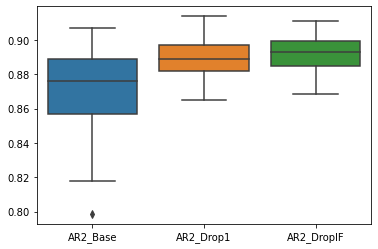

In [24]:
sns.boxplot(data=box[['AR2_Base','AR2_Drop1', 'AR2_DropIF']]);

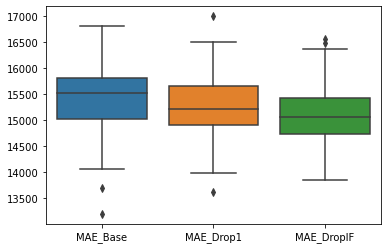

In [25]:
sns.boxplot(data=box[['MAE_Base', 'MAE_Drop1', 'MAE_DropIF']]);